In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import nibabel as nib
from time import time
from xml.etree import ElementTree as ET
import os
import pandas as pd
import sys
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter
from scipy import signal
from scipy.ndimage import zoom
import smtplib
from email.mime.text import MIMEText
import re
import skimage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

sys.path.insert(0, '/home/users/brezovec/projects/lysis/')
from bruker import *

sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants

#%matplotlib inline
#%matplotlib notebook

In [2]:
from BigBadBrain.brain import bleaching_correction, z_score_brain, get_resolution, save_brain, load_numpy_brain, get_dims
from BigBadBrain.fictrac import load_fictrac, prep_fictrac
from BigBadBrain.utils import load_timestamps, get_fly_folders, send_email
from BigBadBrain.glm import fit_glm, save_glm_map
from BigBadBrain.motcorr import get_motcorr_brain

In [6]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/functional.nii'

In [7]:
brain = load_numpy_brain(file)

In [9]:
slice_ = brain[:,:,21,:,1]

In [11]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/slice_for_sharon'
np.save(save_file, slice_)

In [12]:
3

3

In [13]:
data_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/motcorr/motcorr_params.npy'
data = np.load(data_file)

In [15]:
data.shape

(4128, 12)

In [16]:
xyz = data[:,9:]

In [17]:
xyz.shape

(4128, 3)

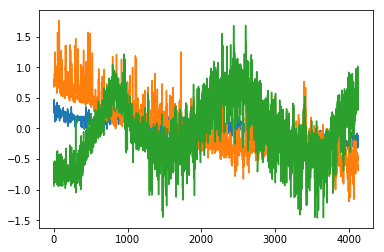

In [19]:
plt.plot(xyz)
plt.show()

In [21]:
1/2.29

0.4366812227074236

In [22]:
time_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_25/'
times = load_timestamps(time_file)


~~ Loading Timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
Duration: 40.21 ms


(4128, 51)

In [28]:
(times[1,20]-times[0,20])

436.06224000000003

In [35]:
Fs/2

1.1465

In [ ]:
fft_signal()

In [42]:
def fft_signal(signal, sampling_rate, duration):
    Fs = sampling_rate
    y = signal
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(0,duration,Ts) # time vector
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    return y,Y,t

/home/users/brezovec/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/users/brezovec/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/users/brezovec/.local/lib/python3.6/site-packa

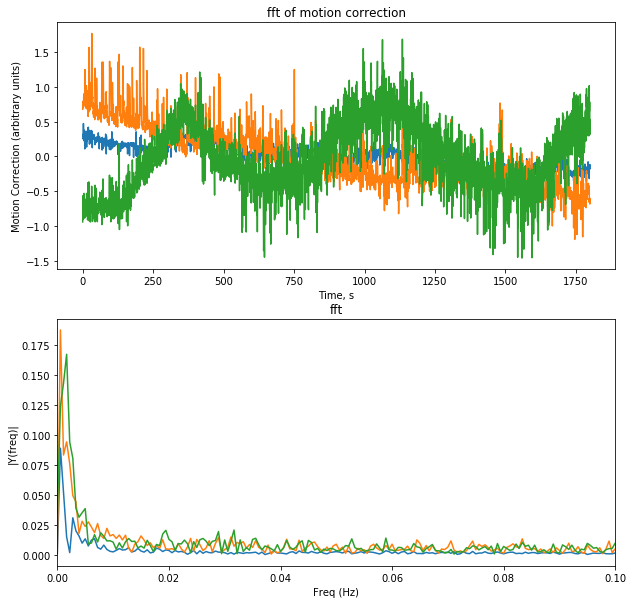

In [50]:
Ys = []
fig = plt.figure(figsize=(10,10))
for i in range(3):
    y,Y,t = fft_signal(signal=xyz[:,i], sampling_rate=2.293, duration=1800)
    #Ys.append(Y)
    
    #Ys = np.asarray(Ys)
    
    plt.subplot(211)
    plt.plot(t,y)
    plt.xlabel('Time, s')
    plt.ylabel('Motion Correction (arbitrary units)')
    plt.title('fft of motion correction')

    plt.subplot(212)
    plt.plot(frq,abs(Y)) # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.title('fft')
    #plt.ylim(0,.002)
    plt.xlim(0,0.1)
plt.show()